In [98]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from keras.layers import Flatten, Dense

In [99]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [100]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [101]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

In [102]:
model = tf.keras.models.Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [103]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [104]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 128)               100480    
                                                                 
 dense_24 (Dense)            (None, 128)               16512     
                                                                 
 dense_25 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [105]:
history = model.fit(
    X_train,
    y_train,
    epochs=60,
    batch_size=512,
    validation_data=(X_valid, y_valid)
)

Epoch 1/60


108/108 [==============================] - 13s 84ms/step - loss: 0.7059 - accuracy: 0.7578 - val_loss: 0.4528 - val_accuracy: 0.8466
Epoch 2/60
108/108 [==============================] - 5s 48ms/step - loss: 0.4381 - accuracy: 0.8459 - val_loss: 0.4279 - val_accuracy: 0.8502
Epoch 3/60
108/108 [==============================] - 5s 49ms/step - loss: 0.3928 - accuracy: 0.8615 - val_loss: 0.3948 - val_accuracy: 0.8656
Epoch 4/60
108/108 [==============================] - 5s 48ms/step - loss: 0.3680 - accuracy: 0.8681 - val_loss: 0.3596 - val_accuracy: 0.8722
Epoch 5/60
108/108 [==============================] - 5s 50ms/step - loss: 0.3412 - accuracy: 0.8771 - val_loss: 0.3394 - val_accuracy: 0.8788
Epoch 6/60
108/108 [==============================] - 5s 48ms/step - loss: 0.3229 - accuracy: 0.8841 - val_loss: 0.3283 - val_accuracy: 0.8826
Epoch 7/60
108/108 [==============================] - 6s 53ms/step - loss: 0.3164 - accuracy: 0.8855 - val_loss: 0.3527 - val_accuracy: 0.8694
Epoch 8/6

In [106]:
results = model.evaluate(X_test, y_test)
print(results)

313/313 [==============================] - 3s 7ms/step - loss: 104.9526 - accuracy: 0.8567
[104.95262145996094, 0.8567000031471252]


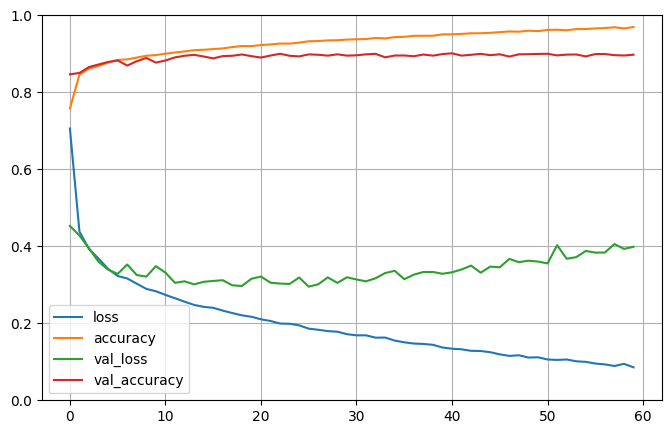

In [107]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

 13/313 [>.............................] - ETA: 1s 

313/313 [==============================] - 2s 7ms/step


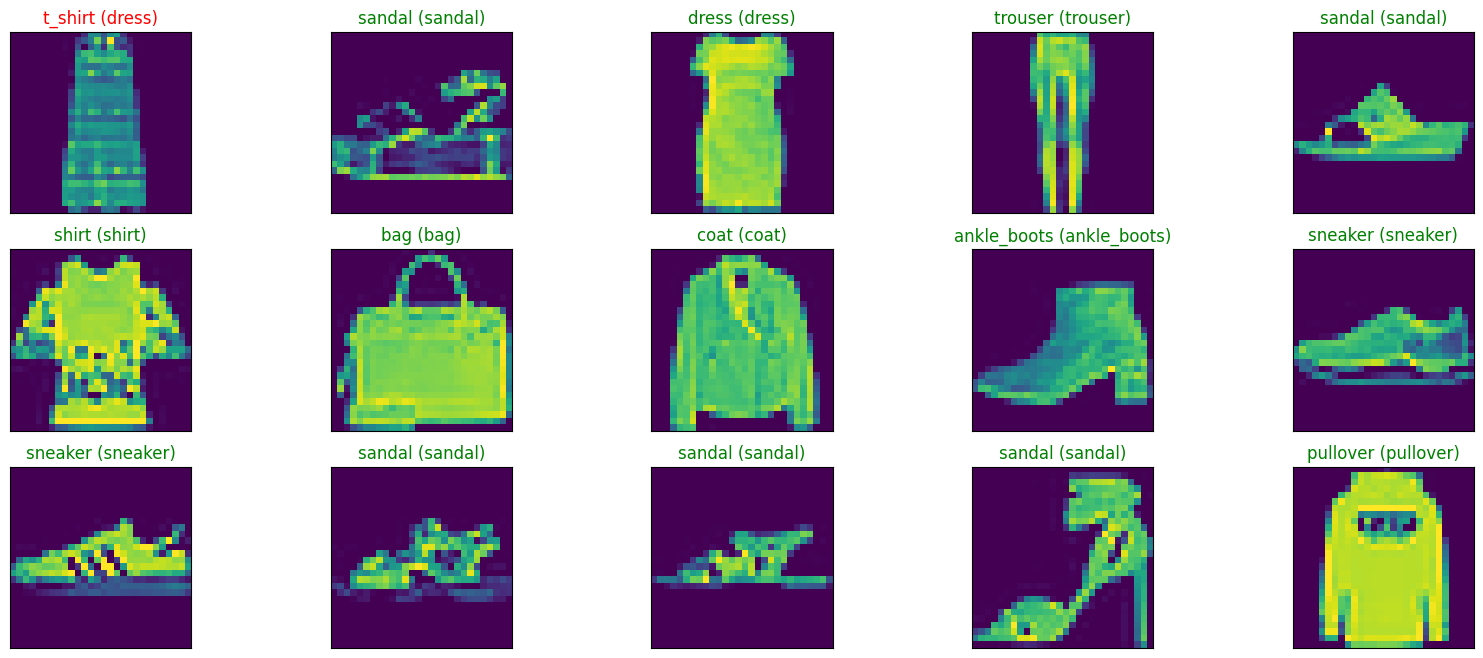

In [111]:
fashion_mnist_labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
y_hat = model.predict(X_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))